In [1]:
import Pkg
Pkg.activate("Boris")

  Activating project at `~/Documents/Courses/Fall2024/Seminar/BorisPusher/Boris`


In [2]:
# Pkg.add("DifferentialEquations")

In [3]:
using DifferentialEquations
using Plots

In [4]:
function system!(du, u, p, t)
    # System of equations
    x1, x1_prime, x2, x2_prime, x3, x3_prime = u
    epsilon = p[1]
    
    # Equations
    du[1] = x1_prime            # x1' = x1_prime
    du[2] = x1/(x1^2 + x2^2)^(3/2) + x2_prime * (1.0/epsilon + x3) # x1''
    du[3] = x2_prime            # x2' = x2_prime
    du[4] = x2/(x1^2 + x2^2)^(3/2) - x3_prime * x1 - x1_prime * (1.0/epsilon + x3) # x2''
    du[5] = x3_prime            # x3' = x3_prime
    du[6] = x2_prime * x1       # x3''
end

system! (generic function with 1 method)

In [5]:
# Initial conditions
x_0 = [1/3, 1/4, 1/2];
v_0 = [2/5, 2/3, 1];

In [37]:
# Initial conditions array
u0 = [x_0[1], v_0[1], x_0[2], v_0[2], x_0[3], v_0[3]] 

# Parameters: epsilon and time
j = 5
epsilon = (1/2)^j;
t0 = 0
tf = 1

(0.0, 1.0)

In [58]:
nt = 4000;
h = (tf-t0)/(nt-1);
time = t0:h:tf;

In [59]:
# Solving the system using the Tsit5 (Runge-Kutta) method
prob = ODEProblem(system!, u0, (t0, tf), [epsilon]);
sol = solve(prob, Tsit5());

In [60]:
sol(time)

t: 0.0:0.00025006251562890725:1.0
u: 4000-element Vector{Vector{Float64}}:
 [0.3333333333333333, 0.4, 0.25, 0.6666666666666666, 0.5, 1.0]
 [0.3334341755595475, 0.4065598491450698, 0.2501664034595175, 0.6641698572267398, 0.5002500694091471, 1.0000554767339176]
 [0.3335366486699258, 0.4130984624138414, 0.250332187451589, 0.6616194400553387, 0.500500152575513, 1.0001107648684244]
 [0.33364074726062487, 0.41961536847219405, 0.2504973374933892, 0.6590155817558832, 0.5007502494535743, 1.0001658596616592]
 [0.33374646583419953, 0.42611009889747753, 0.25066183918961077, 0.6563584520570834, 0.5010003599967454, 1.0002207563921015]
 [0.3338537987996028, 0.43258218817851246, 0.25082567823246454, 0.6536482238129392, 0.501250484157378, 1.0002754503585713]
 [0.33396274047218566, 0.43903117371559, 0.2509888404016794, 0.6508850730027398, 0.5015006218867616, 1.00032993688023]
 [0.33407328507369727, 0.44545659582047187, 0.25115131156450227, 0.6480691787310646, 0.5017507731351231, 1.0003842112965786]
 [0.

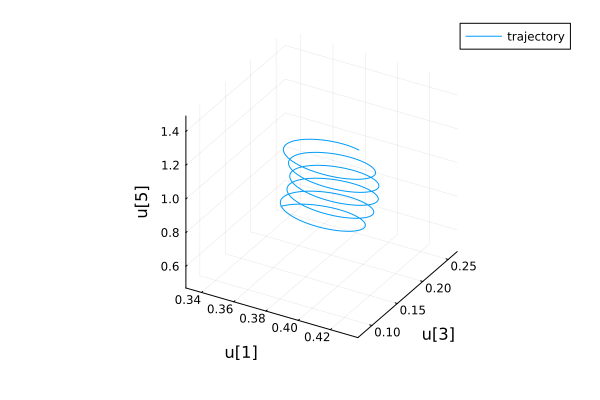

In [39]:
plot(sol, vars=(1,3,5), label="trajectory")

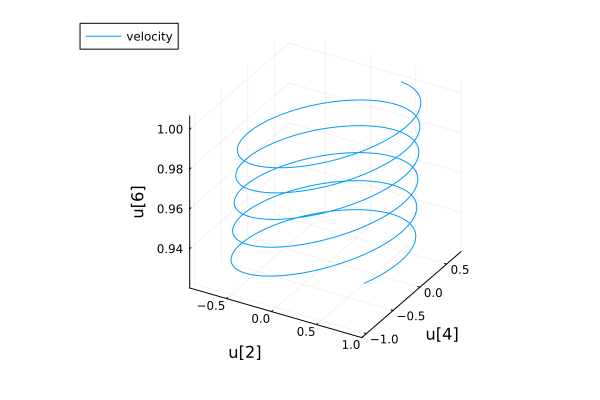

In [63]:
plot(sol, vars=(2,4,6), label="velocity")